# Predicting Diabetes

## Import Libraries

In [7]:
import pandas as pd                  # dataframes
import matplotlib.pyplot as plt      # data plotting
import numpy as np                   # N-dim object support and linear algebra

# do plotting inline instead of in a separate window
%matplotlib inline

## Load and review data

In [24]:
df = pd.read_csv("/Users/srishti/MachineLearningWithPython/Notebooks/data/pima-data.csv") # load Pima data, adjust path

In [26]:
df.shape

(768, 10)

In [30]:
df.head(5) # 0-based row indexing

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [32]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         | 0 is valid
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |

## Check for null values

In [42]:
df.isnull().values.any() # would return True if any nulls found

False

### Correlated Feature Check
Helper function that displays correlation by color.  Yellow is most correlated, Blue least.

In [55]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  darkblue-blue-cyan-green-yellow => less to more correlated
                                                0 ------------------>  1
                                                Expect a yellow line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

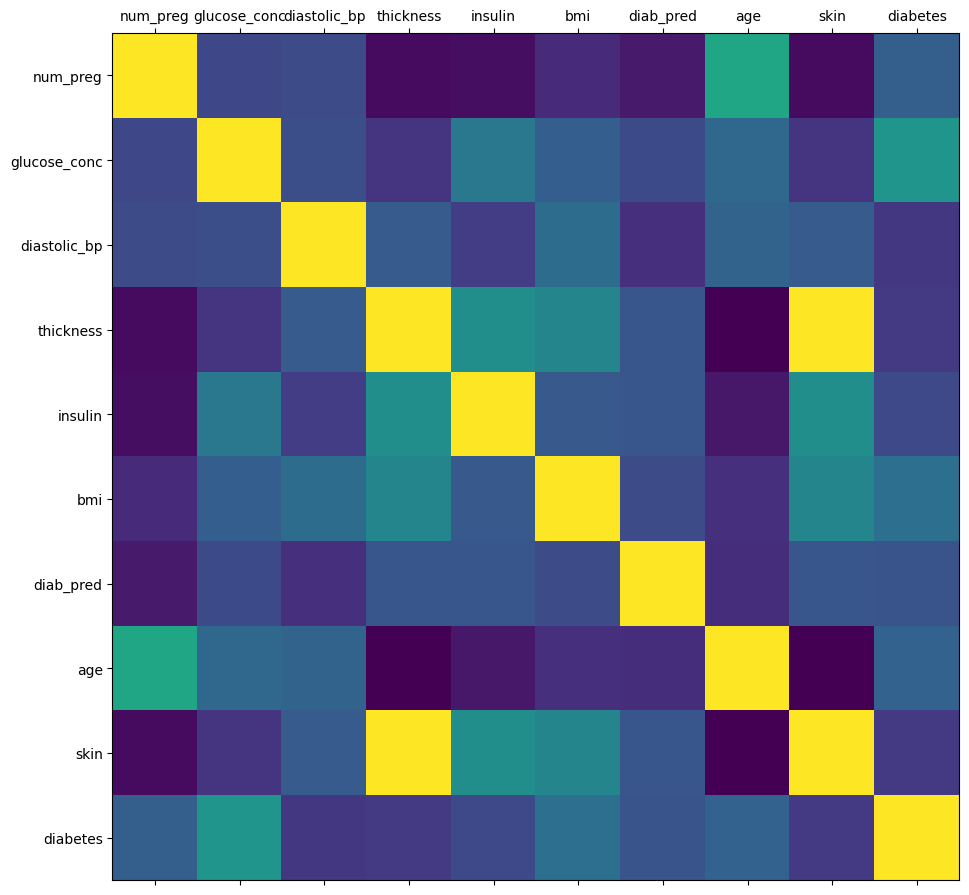

In [57]:
plot_corr(df)

The data columns for skin and thickness seem to be heavily correlated. Let's check the numbers.

In [62]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


They have a correlation of 1 so it looks like they have the same data - let's drop the skin column.

In [67]:
del df['skin']

Let's recheck the color correlation matrix to be sure that we don't have to drop any other columns.

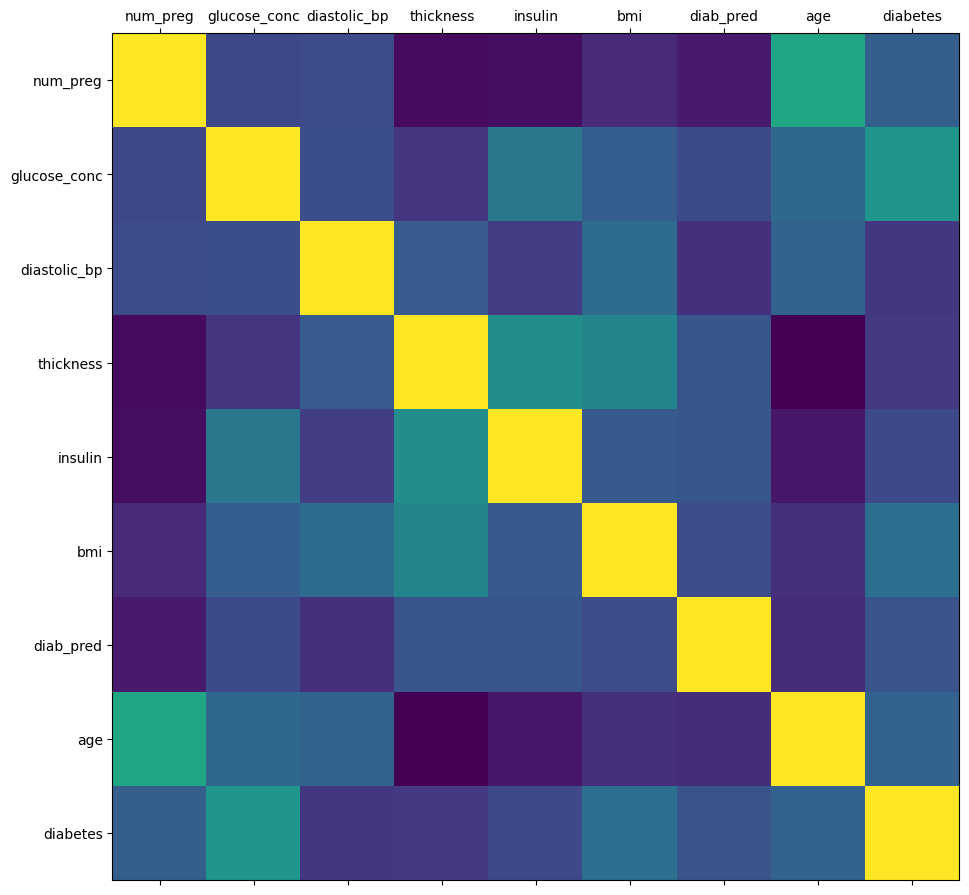

In [77]:
plot_corr(df)

## Check Data Types

In [80]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


The diabetes feature is either categorized as True or False. Let's make it numerical by changing it to 1 (True) or 0 (False) so that all algorithms can understand that feature.

In [88]:
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map) # pandas method that will use the map to convert

In [90]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Good, it's been converted.

## Check true/false ratio
Let's check the distribution of our data to make sure that training on it will also our algorithm to predict all outcomes. That way, we can ensure that we are accurately training our algorithm.

In [100]:
num_obs = len(df)
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


### Splitting the data
70% for training and 30% for testing

In [178]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values        # 8 x m
y = df[predicted_class_names].values    # 1 x m
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)
# test_size = 0.3 is 30%, random state 42 is the seed that randomly splits the set

### Reconvert to pandas Dataframes

In [189]:
# train_test_split returns numpy arrays, but we want them to be pandas Dataframes
print("type before:", type(X_train))
print("type before:", type(X_test))
print("type before:", type(y_train))
print("type before:", type(y_test))

# let's convert
X_train = pd.DataFrame(X_train, columns=feature_col_names)
X_test = pd.DataFrame(X_test, columns=feature_col_names)
y_train = pd.DataFrame(y_train, columns=predicted_class_names)
y_test = pd.DataFrame(y_test, columns=predicted_class_names)

# recheck the types
print("type after:", type(X_train))
print("type after:", type(X_test))
print("type after:", type(y_train))
print("type after:", type(y_test))

type before: <class 'pandas.core.frame.DataFrame'>
type before: <class 'pandas.core.frame.DataFrame'>
type before: <class 'pandas.core.frame.DataFrame'>
type before: <class 'pandas.core.frame.DataFrame'>
type after: <class 'pandas.core.frame.DataFrame'>
type after: <class 'pandas.core.frame.DataFrame'>
type after: <class 'pandas.core.frame.DataFrame'>
type after: <class 'pandas.core.frame.DataFrame'>


We check to ensure we have the desired 70% train, 30% test split of the data

In [192]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.92% in training set
30.08% in test set


### Verify predicted value was split correctly (good proportion of T/F in each set)

In [197]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train['diabetes'] == 1]), (len(y_train[y_train['diabetes'] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train['diabetes'] == 0]), (len(y_train[y_train['diabetes'] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test['diabetes'] == 1]), (len(y_test[y_test['diabetes'] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test['diabetes'] == 0]), (len(y_test[y_test['diabetes'] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-split Data Preparation

 #### Hidden Missing Values

In [201]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are all of thses 0 values possible? e.g. Can you really have a skin thickness of 0?

How many other rows have unexpected 0 values?

In [204]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


Only insulin might have a valid 0 value, and even then it's likely not correct.
### Impute with the mean

In [207]:
from sklearn.impute import SimpleImputer

# impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

# num_preg can have a value of 0.
# we need to skip imputing the 'num_preg' column
cols_not_num_preg = X_train.columns.difference(['num_preg'])
pd.options.mode.chained_assignment = None  # supress warning message on transformed assignment

# impute the training data
X_train[cols_not_num_preg] = fill_0.fit_transform(X_train[cols_not_num_preg])

# impute the test data
X_test[cols_not_num_preg] = fill_0.transform(X_test[cols_not_num_preg])

## Training Initial Algorithm - Naive Bayes

In [209]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.values.flatten())

GaussianNB()

### Performance on Training Data

In [217]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7523



### Performance on Testing Data

In [224]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7403


#### Metrics

In [229]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

# True Negative     False Positive
# False Negative    True Positive

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Recall is how well the model predicts a person's likelihood of developing diabetes when the person actually does have diabetes, while precision is how often the person actually had diabetes when the model predicted they had a likelihood of developing diabetes. 

The model has a recall of 65% and a precision of 62%. These could definitely be higher. 

Let's try another algorithm that is more complicated and so can maybe capture more nuances in the data to improve performance: Random Forest.

## Random Forest

In [235]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.values.flatten()) 

RandomForestClassifier(n_estimators=10, random_state=42)

### Predict Training Data

In [238]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9851


Woah, near perfect.

### Predict Test Data

In [243]:
rf_predict_test = rf_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7316


Ouch, not as perfect...

In [246]:
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[123  28]
 [ 34  46]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



The recall is low at 57%. It must be overfitting the training data. We can't adjust Random Forest because the hyperparameter that is likely to impact overfitting is oob_score = true and we don't have enough data to use it. We could try improving the training by using cross validation, but that does not always have as much of an impact with random forest since the algorithm is essentially doing cross validation by building multiple trees and comparing them.

Let's try Logistic Regression.

## Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.values.flatten())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7576
[[130  21]
 [ 35  45]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       151
           1       0.68      0.56      0.62        80

    accuracy                           0.76       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



Recall is still low at 56%. Let's make a loop that changes the regularization parameter and returns the highest recall.

#### Setting regularization parameter

1st max value of 0.613 occured at C=2.900


Text(0, 0.5, 'recall score')

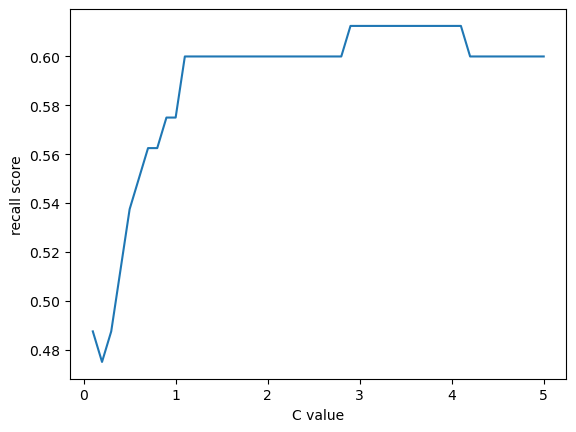

In [265]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val) # track the current regularization
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.values.flatten())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score) # track the associated recall score
    if (recall_score > best_recall_score): # if it is the best recall score so far
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test # track that
        
    C_val = C_val + C_inc # try the next incremeneted regularization value

# find the index of the best recall scores in the recall score array
# use that to find the associated regularization paramter because the indexes match
best_score_C_val = C_values[recall_scores.index(best_recall_score)] 
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

The recall is better but still not at least 70% like we hoped. Maybe this is because we had more non-diabetes results (65%) than diabetes results (35%). Let's enable Logistic Regression's class_weight='balanced' parameter to fix this.

### Logisitic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.200


Text(0, 0.5, 'recall score')

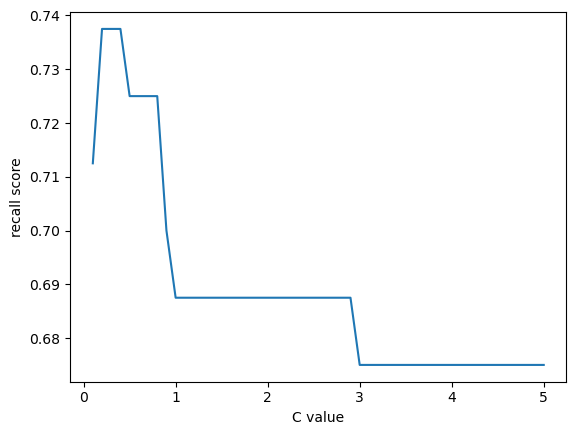

In [275]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    # class_weight="balanced" is now added, everything else is the same from before
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.values.flatten()) 
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Let's use the best regularization value from above to see how the recall is now.

In [278]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.values.flatten())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7186
[[107  44]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       151
           1       0.57      0.74      0.64        80

    accuracy                           0.72       231
   macro avg       0.70      0.72      0.71       231
weighted avg       0.74      0.72      0.72       231

0.7375


Nice, but we sort of cheated by setting the regularization value based on the test data. Is there some way we could test on more data and ensure that we have the algorithm tuned to perform well on a wide set of data? Yes, there is, but we may trade off some performance on the test set for better performance on a wider set of data. Let's try cross-validation.

### LogisticRegressionCV

In [283]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
# n_jobs=-1 tells application to use all the cores on the system
# cv=10 means 10 folds in the training set
# cs=3 means to try 3 values when trying to find the best regularization parameter for each fold
lr_cv_model.fit(X_train, y_train.values.flatten())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

### Predict on Test data

In [286]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7100
[[111  40]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       151
           1       0.57      0.66      0.61        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



The recall (66%) isn't as good at it was when we were tuning the model purely on the testing data, but the model will probably perform better on real-world data now. 

I guess we could play with the parameters of LogisticRegressionCV to try to improve the score.